
## TOC:
* [First Bullet Header](#first-bullet)
* [Second Bullet Header](#second-bullet)


# Introduction To Data Science: Assignment 1

## 1. Importing Necessary Packages  <a class="anchor" id="first-bullet"></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

## 2. Reading the csv into pandas dataframe <a class="anchor" id="second-bullet"></a>

In [3]:
df = pd.read_csv("cc_dataset_kaggle.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3. Normalization

Normalize function from sklearn is used for Normalization. All the columns except the cust_ID is normalized

In [4]:
df_without_id = df.loc[:,df.columns!='CUST_ID']
df_without_id.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Dropping the rows with NaN to normalize the data

In [5]:
df_without_id =df_without_id.dropna()
df_normalize = normalize(np.array(df_without_id))
df_normalize = pd.DataFrame(df_normalize,columns=df_without_id.columns)
df_normalize.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.00000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400
4,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842


## 4. Visualizing the data in 2d by dimension reduction using PCA

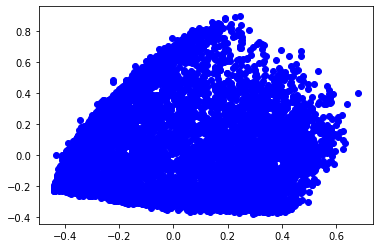

In [6]:
pca_2d = PCA(n_components=2,random_state=41)
pca_2d.fit(np.array(df_normalize))
x=pca_2d.transform(np.array(df_normalize))
plt.scatter(x[:,0],x[:,1],c='b')

## 5. K-Means Greedy Algorithm

In [7]:
def k_means_greedy(df_normalize,k,random_state=60):

    INF = 9999999999999
    x=np.array(df_normalize)
    center_list =[]
    distance_array = [INF]*len(x)
    random.seed(random_state)
    

    def distance(a,b):
        return np.linalg.norm(a-b)



    k_center=[]

    objective_value =INF
    for i in range(0,k):

        cluster_radius=0

        if i==0:
            current_index=random.randint(0,len(x))
            current_center = x[current_index]  # Choose a center rpointandomly
            

        else:
            current_index = distance_array.index(max(distance_array))
            current_center = x[current_index]
            k_center.append((i,current_index,current_center))

        
        center_list.append(current_center)

        for j in range(len(x)):
            point = x[j]
            temp_distance = distance(point,current_center)
            if j==current_index:
                distance_array[j]=0
            

            elif distance_array[j]>temp_distance:
                distance_array[j]=temp_distance
                cluster_radius = max(cluster_radius,temp_distance)

            

        k_center.append((i,current_index,current_center,cluster_radius))
        objective_value = min(objective_value,cluster_radius)
    
    return objective_value,k_center



In [8]:
k_list =[2,4,10]

result=[]

for k in k_list:
    objective_value,k_center = k_means_greedy(df_normalize,k)
    print(f"objective_value for the k value {k} is {objective_value}")
    result.append(k_center)



objective_value for the k value 2 is 1.0029444693561806
objective_value for the k value 4 is 0.9225035776544948
objective_value for the k value 10 is 0.6160462203968864


#### Visualizing the Results

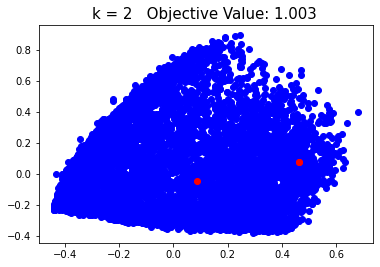

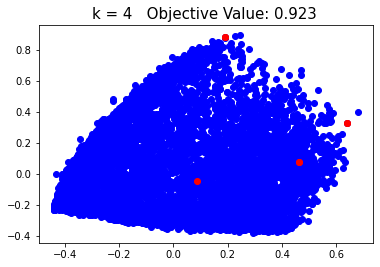

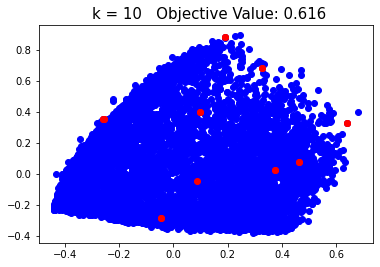

In [9]:
for k in k_list:
    objective_value,k_center = k_means_greedy(df_normalize,k)
    x=pca_2d.transform(np.array(df_normalize))
    fig, ax = plt.subplots()
    ax.scatter(x[:,0],x[:,1],c='blue')
    ax.text(-0.3,1 , f"k = {k}   Objective Value: {round(objective_value,3)}", fontsize=15)
    for item in k_center:
        ax.scatter(x[item[1],0],x[item[1],1],c='red')

### Remarks: 
* The results are heavily depended on the initialization

## 6. Optimizing the Greedy Solution for k=2 and k=4

The optimization can be done by trying to initialize  with all the input points and record the ones with the minimum objective value

In [12]:
def k_means_greedy_optimization(df_normalize,k,random_state=60):

    INF = 9999999999999
    x=np.array(df_normalize)
    center_list =[]
    
    random.seed(random_state)
    

    def distance(a,b):
        return np.linalg.norm(a-b)



    
   
    objective_final =[INF,0]
    objective_history=[]
    final_cluster_points =[]

    
    for a in range(1300):
        distance_array = [INF]*len(x)
        k_center=[]
        objective_value =[INF,0]

        
        for i in range(0,k):

            cluster_radius=0

            if i==0:
                current_index=a
                current_center = x[current_index]  # Choose a center rpointandomly
                

            else:
                current_index = distance_array.index(max(distance_array))
                current_center = x[current_index]
                k_center.append((i,current_index,current_center))

            
            center_list.append(current_center)

            for j in range(len(x)):
                point = x[j]
                temp_distance = distance(point,current_center)
                if j==current_index:
                    distance_array[j]=0
                

                elif distance_array[j]>temp_distance:
                    distance_array[j]=temp_distance
                    # print(temp_distance)
                    cluster_radius = max(cluster_radius,temp_distance)

                

            k_center.append((i,current_index,current_center,cluster_radius))
            # print(cluster_radius)

            if objective_value[0]>cluster_radius:
                objective_value[0] = cluster_radius
                objective_value[1] = current_index
        
        if objective_final[0]>objective_value[0]:
            objective_final = objective_value
            objective_history.append(objective_value)
            final_cluster_points = k_center
            
        
        
        if a%100==0:
            print(f"{a}th iteration, Objective Value={objective_final[0]}")
            
            
        
    return objective_final,objective_history,final_cluster_points






In [175]:
objective_final_k_2,objective_history,final_cluster_points_k_2 = k_means_greedy_optimization(df_normalize,2)

0th iteration, Objective Value=1.2480028168229318
100th iteration, Objective Value=0.8845446183186196
200th iteration, Objective Value=0.8519901628195563
300th iteration, Objective Value=0.7774148191405094
400th iteration, Objective Value=0.7774148191405094
500th iteration, Objective Value=0.7774148191405094
600th iteration, Objective Value=0.7774148191405094
700th iteration, Objective Value=0.7774148191405094
800th iteration, Objective Value=0.7774148191405094
900th iteration, Objective Value=0.7774148191405094
1000th iteration, Objective Value=0.7774148191405094
1100th iteration, Objective Value=0.7774148191405094
1200th iteration, Objective Value=0.7774148191405094
1300th iteration, Objective Value=0.7774148191405094
1400th iteration, Objective Value=0.7774148191405094
1500th iteration, Objective Value=0.7774148191405094
1600th iteration, Objective Value=0.7774148191405094
1700th iteration, Objective Value=0.7774148191405094
1800th iteration, Objective Value=0.7738852541101789
1900t

In [176]:
objective_not_optimal_k_2,k_center_2 = k_means_greedy(df_normalize,2)

approximation_factor_k_2 = objective_not_optimal_k_2/objective_final_k_2[0]
print(f"Approximation factor for k= 2 is {approximation_factor_k_2}")

Approximation factor for k= 2 is 1.3966834349636552


In [9]:
objective_final_k_4,objective_history_k_4,final_cluster_points_k_4 = k_means_greedy_optimization(df_normalize,4)

0th iteration, Objective Value=0.9171114459013948
100th iteration, Objective Value=0.7853849460650332
200th iteration, Objective Value=0.683738673090002
300th iteration, Objective Value=0.683738673090002
400th iteration, Objective Value=0.683738673090002
500th iteration, Objective Value=0.683738673090002
600th iteration, Objective Value=0.683738673090002
700th iteration, Objective Value=0.683738673090002
800th iteration, Objective Value=0.683738673090002
900th iteration, Objective Value=0.683738673090002
1000th iteration, Objective Value=0.683738673090002
1100th iteration, Objective Value=0.683738673090002
1200th iteration, Objective Value=0.6289382228156227
1300th iteration, Objective Value=0.6289382228156227
1400th iteration, Objective Value=0.6289382228156227
1500th iteration, Objective Value=0.6289382228156227
1600th iteration, Objective Value=0.6289382228156227
1700th iteration, Objective Value=0.6289382228156227
1800th iteration, Objective Value=0.6289382228156227
1900th iteratio

In [14]:
objective_not_optimal_k_4,k_center = k_means_greedy(df_normalize,4)
approximation_factor_k_4 = objective_not_optimal_k_4/objective_final_k_4[0]
print(f"Approximation factor for k= 4 is {approximation_factor_k_4}")



Approximation factor for k= 4 is 1.4667634183920994


## Remarks:
* The Approximation Factor is coming about to be **1.3966834349636552** for k=2 and **1.4667634183920994** for k=4.
* Theoretically the Approximation Factor should be less than or equal to 2.
* The Truthness of the Approximation Factor is validated using this experiment.